<a href="https://colab.research.google.com/github/vn322/Sport-University/blob/main/combat/Indoor_Obstacle_Course_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/mexwell/west-point-indoor-obstacle-course-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/refs/heads/main/combat/ioct_west_point.csv')

In [17]:
df.head()

,sex,height,weight,IOCT_Time
0,F,67,134,203
1,F,63,121,197
2,M,72,176,150
3,F,68,168,235
4,F,65,149,210


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sex        384 non-null    object
 1   height     384 non-null    int64 
 2   weight     384 non-null    int64 
 3   IOCT_Time  384 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.1+ KB


In [11]:
df.describe()

,height,weight,IOCT_Time
count,384.000000,384.000000,384.000000
mean,69.075521,168.447917,204.153646
std,3.539708,26.101777,54.792653
min,60.000000,112.000000,139.000000
25%,67.000000,150.000000,170.000000
50%,69.000000,169.000000,186.000000
75%,72.000000,185.000000,223.250000
max,79.000000,264.000000,629.000000


<Axes: >

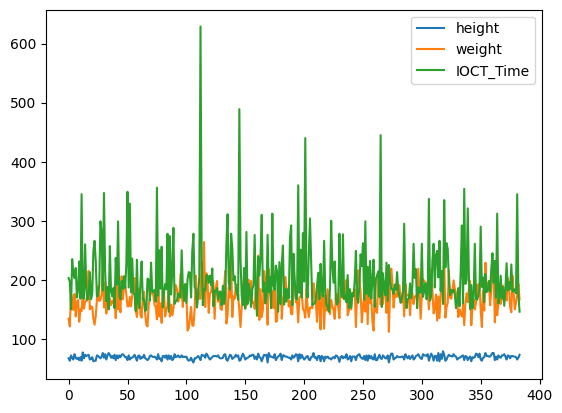

In [55]:
df.iloc[:, 1:4].plot()

In [16]:
df.iloc[:, 1:4].corr()


,height,weight,IOCT_Time
height,1.000000,0.714201,-0.452951
weight,0.714201,1.000000,-0.273381
IOCT_Time,-0.452951,-0.273381,1.000000


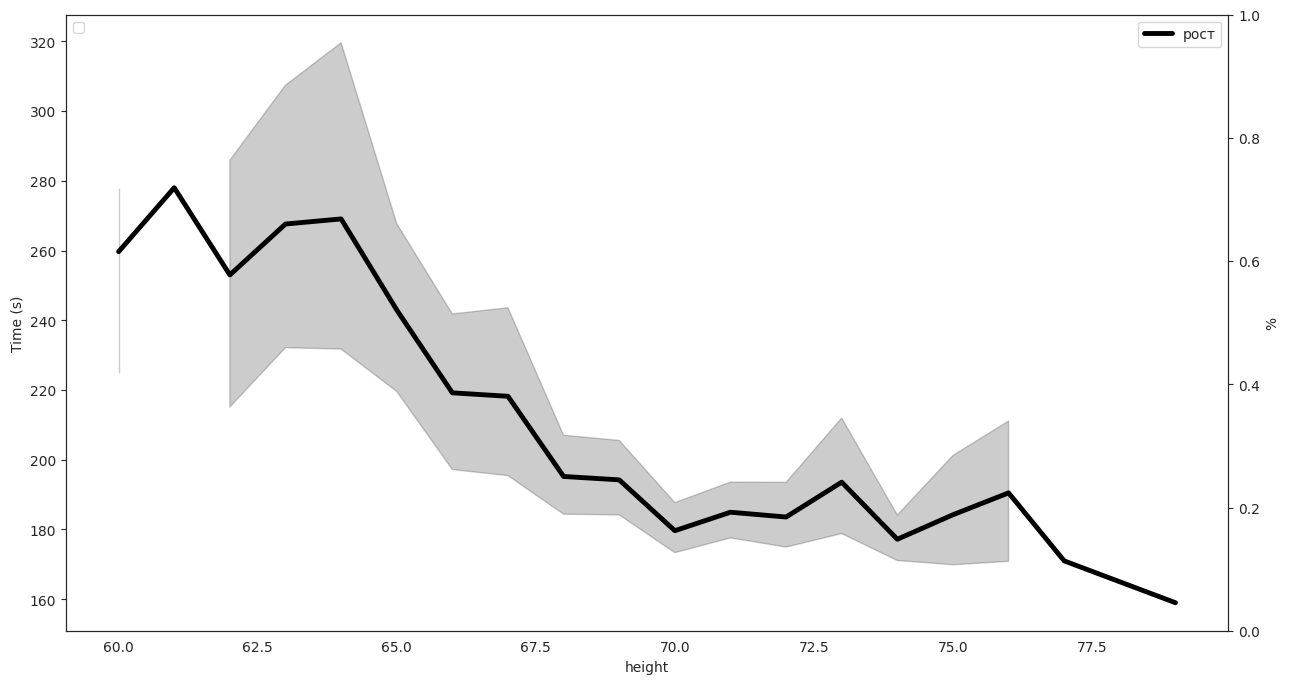

In [66]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(15,8))
g = sns.lineplot(x="height", y="IOCT_Time", data= df, color='black', ax=ax,linewidth = 3.5, label = "рост" )
ax1=ax.twinx()
#g1 = sns.lineplot(x="weight",y='IOCT_Time', data=df,  markers=True, dashes=False, linewidth = 2.5, ax=ax1,alpha=0.7,linestyle='--')
#g.set_title("avg duration vs percentage of finish method",weight='bold')
ax1.legend(loc="upper left")
ax.set(ylabel='Time (s)')
ax1.set(ylabel='%')
plt.xticks(rotation=90)
plt.show()

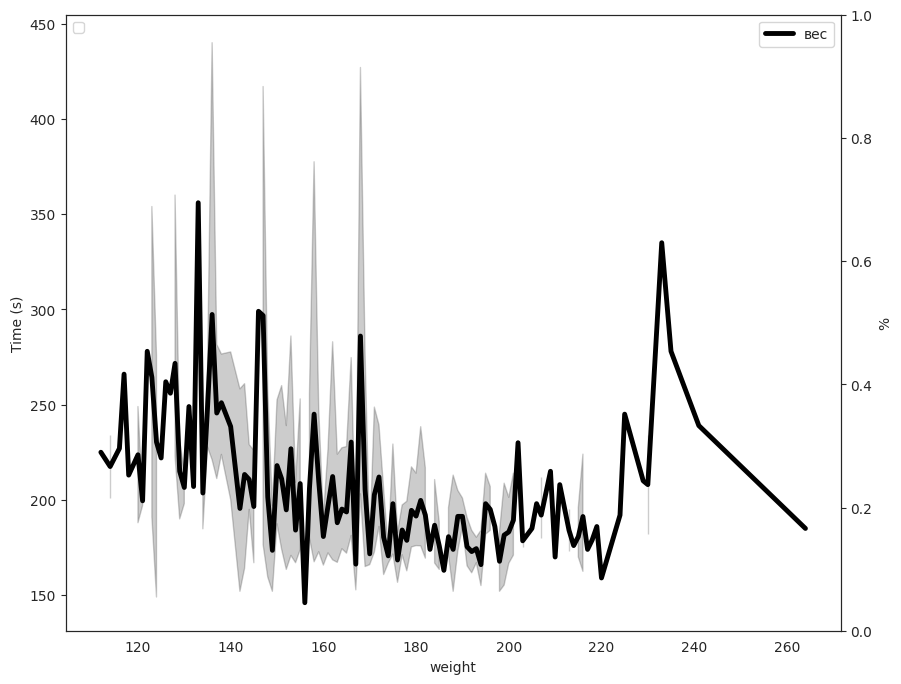

In [67]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10,8))
g = sns.lineplot(x="weight", y="IOCT_Time", data= df, color='black', ax=ax,linewidth = 3.5, label = "вес" )
ax1=ax.twinx()
#g1 = sns.lineplot(x="weight",y='IOCT_Time', data=df,  markers=True, dashes=False, linewidth = 2.5, ax=ax1,alpha=0.7,linestyle='--')
#g.set_title("avg duration vs percentage of finish method",weight='bold')
ax1.legend(loc="upper left")
ax.set(ylabel='Time (s)')
ax1.set(ylabel='%')
plt.xticks(rotation=90)
plt.show()

<Axes: >

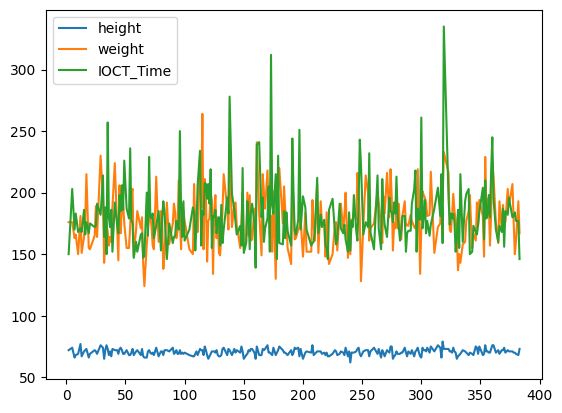

In [53]:
df.iloc[:, 1:4][df.sex == 'M'].plot()

In [20]:
df.iloc[:, 1:4][df.sex == 'M'].describe()

,height,weight,IOCT_Time
count,280.000000,280.000000,280.000000
mean,70.489286,178.114286,181.875000
std,2.672016,22.199514,25.846294
min,62.000000,124.000000,139.000000
25%,69.000000,162.000000,166.000000
50%,70.000000,177.000000,178.000000
75%,72.000000,192.000000,191.000000
max,79.000000,264.000000,335.000000


In [19]:
df.iloc[:, 1:4][df.sex == 'M'].corr()


,height,weight,IOCT_Time
height,1.000000,0.514717,0.009193
weight,0.514717,1.000000,0.255829
IOCT_Time,0.009193,0.255829,1.000000


In [21]:
df.iloc[:, 1:4][df.sex != 'M'].describe()

,height,weight,IOCT_Time
count,104.000000,104.000000,104.000000
mean,65.269231,142.423077,264.134615
std,2.681221,16.142985,66.122725
min,60.000000,112.000000,184.000000
25%,63.000000,130.750000,223.750000
50%,65.000000,140.000000,251.000000
75%,67.000000,153.250000,288.500000
max,73.000000,179.000000,629.000000


In [22]:
df.iloc[:, 1:4][df.sex != 'M'].corr()


,height,weight,IOCT_Time
height,1.000000,0.589069,-0.069042
weight,0.589069,1.000000,0.290521
IOCT_Time,-0.069042,0.290521,1.000000


In [23]:
fem = df.iloc[:, 1:4][df.sex != 'M']
man = df.iloc[:, 1:4][df.sex == 'M']

In [28]:
fem.iloc[:,0]

,height
0,67
1,63
3,68
4,65
6,68
...,...
367,68
372,65
375,67
376,71


height

In [29]:
# Mann-Whitney U test

from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(fem.iloc[:,0], man.iloc[:,0])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=2630.500, p=0.000
Different distribution (reject H0)


In [30]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal


# compare samples
stat, p = kruskal(fem.iloc[:,0], man.iloc[:,0])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')


Statistics=153.449, p=0.000
Different distributions (reject H0)


weight

In [31]:
# Mann-Whitney U test

from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(fem.iloc[:,1], man.iloc[:,1])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=2723.500, p=0.000
Different distribution (reject H0)


In [32]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal


# compare samples
stat, p = kruskal(fem.iloc[:,1], man.iloc[:,1])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')


Statistics=149.995, p=0.000
Different distributions (reject H0)


time

In [33]:
# Mann-Whitney U test

from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(fem.iloc[:,2], man.iloc[:,2])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=27571.000, p=0.000
Different distribution (reject H0)


In [34]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal


# compare samples
stat, p = kruskal(fem.iloc[:,2], man.iloc[:,2])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')


Statistics=181.226, p=0.000
Different distributions (reject H0)


regr

In [36]:
df.columns

Index(['sex', 'height', 'weight', 'IOCT_Time'], dtype='object')

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [38]:
lin_res = ols("IOCT_Time ~ weight + height",data=df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:              IOCT_Time   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     50.73
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.93e-20
Time:                        17:59:45   Log-Likelihood:                -2036.4
No. Observations:                 384   AIC:                             4079.
Df Residuals:                     381   BIC:                             4091.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    730.4184     55.564     13.146      0.0

In [39]:
lin_res = ols("IOCT_Time ~ weight",data=df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:              IOCT_Time   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     30.86
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           5.22e-08
Time:                        18:00:07   Log-Likelihood:                -2066.8
No. Observations:                 384   AIC:                             4138.
Df Residuals:                     382   BIC:                             4146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    300.8224     17.610     17.083      0.0

In [40]:
lin_res = ols("IOCT_Time ~ height",data=df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:              IOCT_Time   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     98.60
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           8.00e-21
Time:                        18:00:21   Log-Likelihood:                -2037.7
No. Observations:                 384   AIC:                             4079.
Df Residuals:                     382   BIC:                             4087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    688.4709     48.838     14.097      0.0

In [41]:
lin_res = ols("IOCT_Time ~ weight + height",data=man).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:              IOCT_Time   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     13.01
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           3.98e-06
Time:                        18:01:09   Log-Likelihood:                -1294.8
No. Observations:                 280   AIC:                             2596.
Df Residuals:                     277   BIC:                             2607.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    224.6541     40.361      5.566      0.0

In [43]:
lin_res = ols("IOCT_Time ~ weight",data=man).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:              IOCT_Time   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     19.47
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.46e-05
Time:                        18:02:14   Log-Likelihood:                -1297.9
No. Observations:                 280   AIC:                             2600.
Df Residuals:                     278   BIC:                             2607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    128.8227     12.116     10.632      0.0

In [44]:
lin_res = ols("IOCT_Time ~  height",data=man).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:              IOCT_Time   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.02349
Date:                Tue, 05 Nov 2024   Prob (F-statistic):              0.878
Time:                        18:02:27   Log-Likelihood:                -1307.4
No. Observations:                 280   AIC:                             2619.
Df Residuals:                     278   BIC:                             2626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    175.6071     40.922      4.291      0.0

In [42]:
lin_res = ols("IOCT_Time ~ weight + height",data=fem).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:              IOCT_Time   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     10.55
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           6.93e-05
Time:                        18:01:34   Log-Likelihood:                -573.12
No. Observations:                 104   AIC:                             1152.
Df Residuals:                     101   BIC:                             1160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    560.2945    151.414      3.700      0.0

In [45]:
lin_res = ols("IOCT_Time ~ weight",data=fem).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:              IOCT_Time   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     9.403
Date:                Tue, 05 Nov 2024   Prob (F-statistic):            0.00277
Time:                        18:03:00   Log-Likelihood:                -578.40
No. Observations:                 104   AIC:                             1161.
Df Residuals:                     102   BIC:                             1166.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.6521     55.622      1.702      0.0

In [46]:
lin_res = ols("IOCT_Time ~ height",data=fem).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:              IOCT_Time   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4885
Date:                Tue, 05 Nov 2024   Prob (F-statistic):              0.486
Time:                        18:03:13   Log-Likelihood:                -582.74
No. Observations:                 104   AIC:                             1169.
Df Residuals:                     102   BIC:                             1175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    375.2672    159.130      2.358      0.0

In [49]:
df['dif'] = df['weight'] - df['height']
df.head()

,sex,height,weight,IOCT_Time,dif
0,F,67,134,203,67
1,F,63,121,197,58
2,M,72,176,150,104
3,F,68,168,235,100
4,F,65,149,210,84


In [50]:
lin_res = ols("IOCT_Time ~ dif",data=df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:              IOCT_Time   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     22.01
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           3.79e-06
Time:                        18:07:14   Log-Likelihood:                -2071.0
No. Observations:                 384   AIC:                             4146.
Df Residuals:                     382   BIC:                             4154.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    257.7674     11.748     21.941      0.0

In [51]:
df['summ'] = df['weight'] + df['height']
df.head()

,sex,height,weight,IOCT_Time,dif,summ
0,F,67,134,203,67,201
1,F,63,121,197,58,184
2,M,72,176,150,104,248
3,F,68,168,235,100,236
4,F,65,149,210,84,214


In [52]:
lin_res = ols("IOCT_Time ~ summ",data=df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:              IOCT_Time   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     38.93
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.17e-09
Time:                        18:08:26   Log-Likelihood:                -2063.1
No. Observations:                 384   AIC:                             4130.
Df Residuals:                     382   BIC:                             4138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    341.8792     22.235     15.376      0.0